DL_HW2_310706035_陳柏穎
# 1. 程式簡介


<img src="1122174436.png" height="400px" width="500px" >

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from keras.datasets import mnist
from keras.utils import np_utils
from dense import Dense
from convolutional import Convolutional
from maxpool2d import Maxpool2d
from reshape import Reshape
from activations import Sigmoid, Tanh, Relu, Softmax
from network import train, predict, save_network, load_network, plot_output

def preprocess_data(x, y, limit):
    all_indices = np.hstack(list(np.where(y == x)[0][:limit] for x in range(10)))
    all_indices = np.random.permutation(all_indices)
    x, y = x[all_indices], y[all_indices]
    x = x.reshape(len(x), 1, 28, 28)
    x = x.astype("float32") / 255
    y = np_utils.to_categorical(y)
    y = y.reshape(len(y), 10, 1)
    return x, y

# load MNIST from server, limit to 100 images per class since we're not training on GPU
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, y_train = preprocess_data(x_train, y_train, 100)
x_valid, y_valid = x_train[900:], y_train[900:]
x_train, y_train = x_train[:900], y_train[:900]
x_test, y_test = preprocess_data(x_test, y_test, 100)

l2 = 1e-1
learning_rate = 3e-2

network = [
    Convolutional((1, 28, 28), 3, 10, l2=l2),
    Maxpool2d(0, 2, 2, (10, 13, 13)),
    Tanh(),
    Convolutional((10, 13, 13), 3, 10, l2=l2),
    Maxpool2d(1, 2, 2, (10, 6, 6)),
    Tanh(),
    Reshape((10, 6, 6), (10 * 6 * 6, 1)),
    Dense(10 * 6 * 6, 100, l2=l2),
    Tanh(),
    Dense(100, 10, l2=l2),
    Softmax()
]

net_id = '1122200036'
load_network(network, net_id)


In [7]:
pred_res = [int(np.argmax(predict(network, x)) == np.argmax(y)) for x,y in zip(x_test, y_test)]
acc = sum(pred_res)/len(pred_res)
print(f"test accuracy: {acc}")

test accuracy: 0.818


Label: 5, Predict: 9


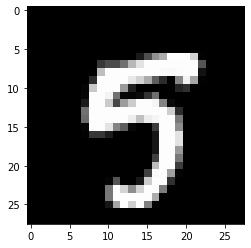

Label: 9, Predict: 9


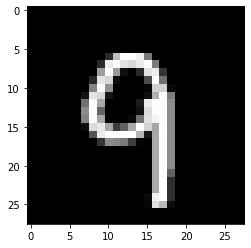

In [8]:
i = pred_res.index(0)
xi, yi = x_test[i], y_test[i]
y_pred = predict(network, xi)
print(f'Label: {np.argmax(yi)}, Predict: {np.argmax(y_pred)}')
plt.imshow(xi.reshape(28,28), cmap='gray')
plt.show()

j = pred_res.index(1)
xj, yj = x_test[j], y_test[j]
y_pred = predict(network, xj)
print(f'Label: {np.argmax(yj)}, Predict: {np.argmax(y_pred)}')
plt.imshow(xj.reshape(28,28), cmap='gray')
plt.show()

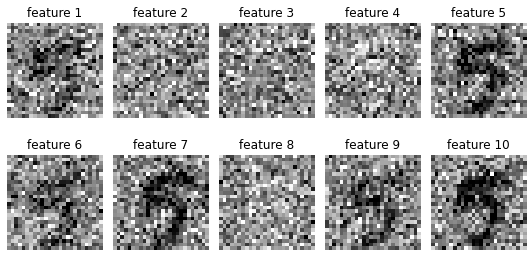

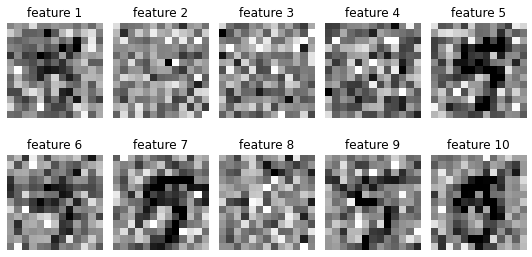

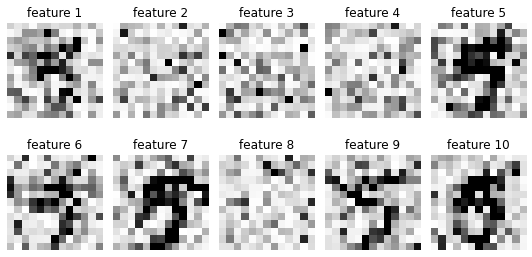

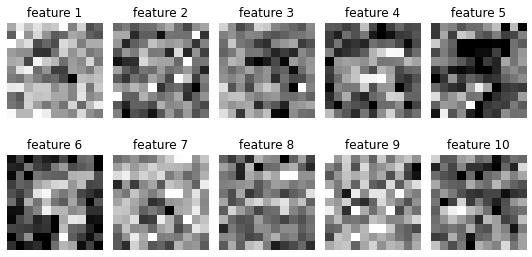

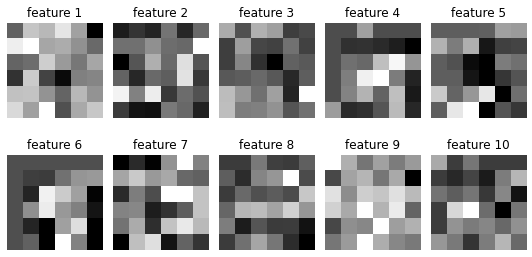

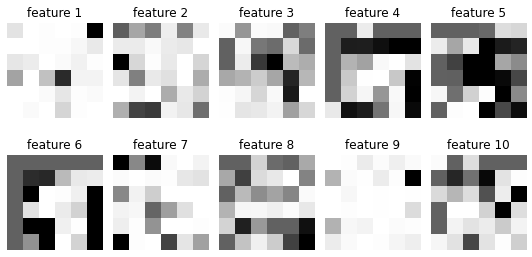

In [9]:
plot_output(network, xi)

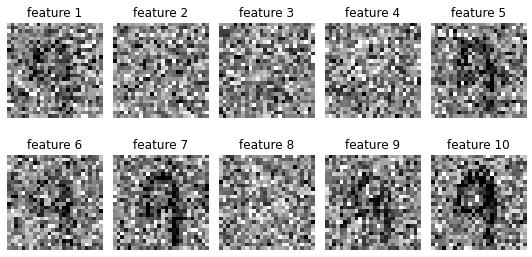

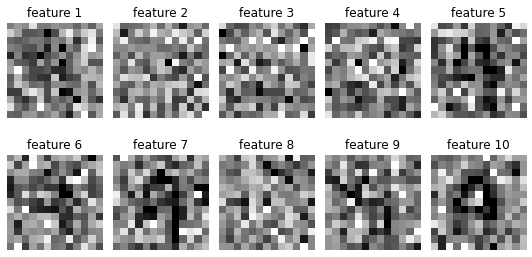

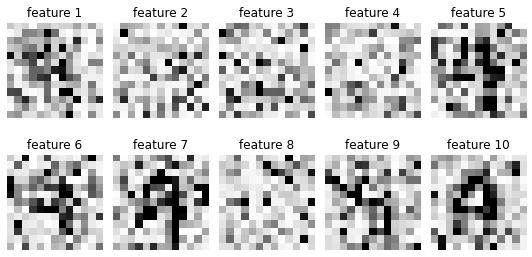

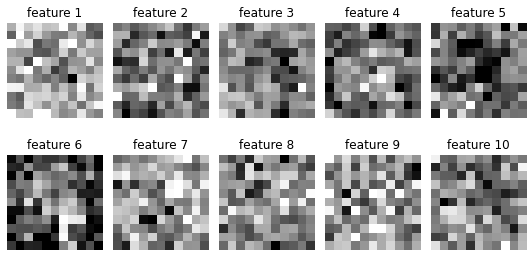

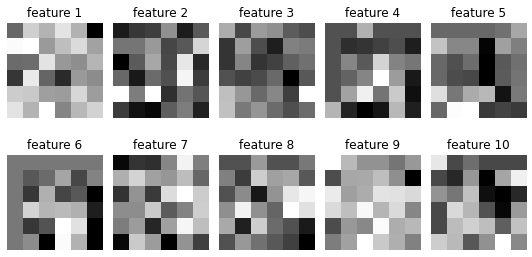

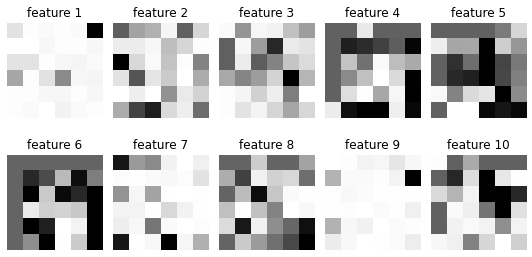

In [10]:
plot_output(network, xj)